# Megfelelő könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Adathalmaz behívása

In [2]:
adat = pd.read_csv('Hugyag_teljes_adatsor_szűrt.csv', sep=';', encoding='latin-1')
adat.head(10)

,Deklináció,Óra paraméter,Globális sugárzás,Modul hõmérséklet,Hõmérséklet,Harmatpont,Csapadék,Termelt energia
0,0.07011,0.00,0.0,-0.49,-3.9,-23.6,0.0,0.0
1,0.07011,0.15,0.0,-0.66,-4.3,-24.0,0.0,0.0
2,0.07011,0.30,0.0,-0.90,-4.6,-23.7,0.0,0.0
3,0.07011,0.45,0.0,-1.19,-4.8,-23.3,0.0,0.0
4,0.07011,1.00,0.0,-1.49,-5.0,-23.0,0.0,0.0
5,0.07011,1.15,0.0,-1.83,-5.2,-23.2,0.0,0.0
6,0.07011,1.30,0.0,-2.19,-5.3,-22.8,0.0,0.0
7,0.07011,1.45,0.0,-2.57,-5.4,-22.4,0.0,0.0
8,0.07011,2.00,0.0,-2.95,-5.5,-22.5,0.0,0.0
9,0.07011,2.15,0.0,-3.32,-5.8,-22.3,0.0,0.0


# Korrelációs mátrix

<AxesSubplot:>

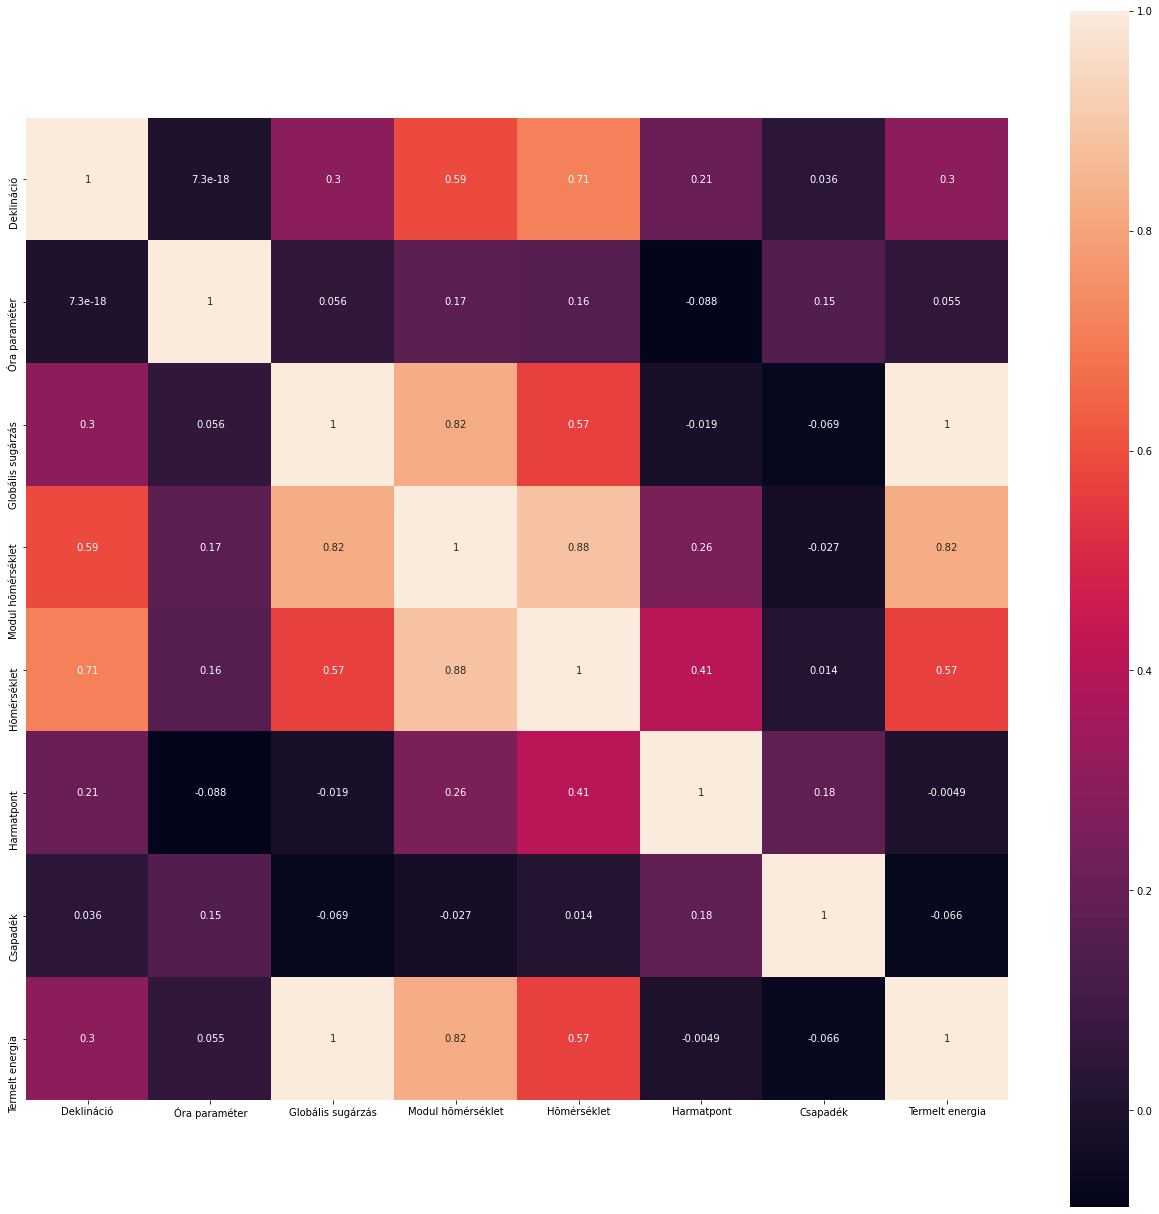

In [3]:
corr_heat = adat.corr(method='pearson',min_periods=1)
plt.figure(figsize = (22,22))
sns.heatmap(corr_heat, annot = True, square = True)

# Adatok szétválasztása bemeneti paraméterekre és célváltozóra (X, Y)

In [5]:
x = adat.iloc[:, 0:-1].values
y = adat.iloc[:, -1].values
y = np.reshape(y, (-1,1))
print(x.shape, y.shape)

(26400, 7) (26400, 1)


# Adatok szétválasztása tanuló és teszt adathalmazra

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Tanuló halmaz: {} {} \nTeszt halmaz: {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Tanuló halmaz: (21120, 7) (21120, 1) 
Teszt halmaz: (5280, 7) (5280, 1)


# Adathalmaz normalizálása

In [8]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
x_trainsc = x_sc.fit_transform(x_train)
x_testsc = x_sc.transform(x_test)
y_sc = StandardScaler()
y_trainsc = y_sc.fit_transform(y_train)    
y_testsc = y_sc.transform(y_test)
x_trainsc

array([[-0.91928804, -1.64597967, -0.67098488, ..., -0.75108252,
        -0.16510327, -0.25430721],
       [ 0.29188283,  1.35985126, -0.67098488, ...,  1.15961208,
         0.88890774, -0.25430721],
       [ 1.05808206, -1.50181512, -0.67098488, ..., -0.18708231,
         0.19395542, -0.25430721],
       ...,
       [ 1.07575489,  0.20653484,  0.77600822, ...,  0.58410166,
        -0.10719058,  0.86563955],
       [ 0.97235515, -0.03854491,  2.24251045, ...,  1.51642854,
         1.25954897, -0.25430721],
       [ 0.61537091, -0.10341895,  1.78263692, ...,  0.75675479,
         0.3676935 , -0.25430721]])

# Előrecsatolt neurális háló felépítése

In [10]:
def create_ann (n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i == 0:
      model.add(Dense(nodes, kernel_initializer = kernels, activation = n_activation, input_dim = x_train.shape[1]))
    else:
      model.add(Dense(nodes, activation = n_activation, kernel_initializer = kernels))  
  model.add(Dense(1))
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model

solcast = create_ann([32, 64], 'relu', 'normal')
solcast.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


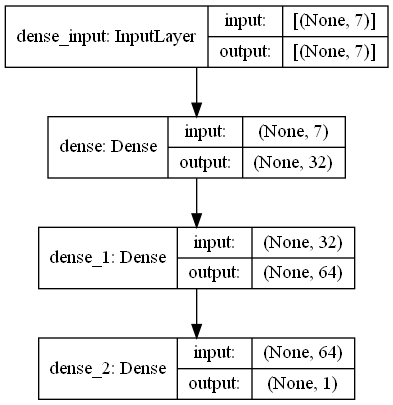

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(solcast, show_shapes = True, show_layer_names = True)

In [13]:
hist = solcast.fit(x_train, y_train, batch_size = 32, validation_data = (x_test, y_test), epochs = 100, verbose = 2)

Epoch 1/100
660/660 - 1s - loss: 1365.1564 - root_mean_squared_error: 36.9480 - val_loss: 85.9863 - val_root_mean_squared_error: 9.2729
Epoch 2/100
660/660 - 1s - loss: 81.3527 - root_mean_squared_error: 9.0196 - val_loss: 83.8075 - val_root_mean_squared_error: 9.1546
Epoch 3/100
660/660 - 0s - loss: 81.3842 - root_mean_squared_error: 9.0213 - val_loss: 83.3297 - val_root_mean_squared_error: 9.1285
Epoch 4/100
660/660 - 1s - loss: 80.7404 - root_mean_squared_error: 8.9856 - val_loss: 91.4838 - val_root_mean_squared_error: 9.5647
Epoch 5/100
660/660 - 0s - loss: 79.4865 - root_mean_squared_error: 8.9155 - val_loss: 84.1587 - val_root_mean_squared_error: 9.1738
Epoch 6/100
660/660 - 0s - loss: 78.4060 - root_mean_squared_error: 8.8547 - val_loss: 83.0146 - val_root_mean_squared_error: 9.1112
Epoch 7/100
660/660 - 1s - loss: 79.1646 - root_mean_squared_error: 8.8975 - val_loss: 82.8731 - val_root_mean_squared_error: 9.1035
Epoch 8/100
660/660 - 0s - loss: 78.3169 - root_mean_squared_error

# RMSE és MSE hiba datok megjelenítése

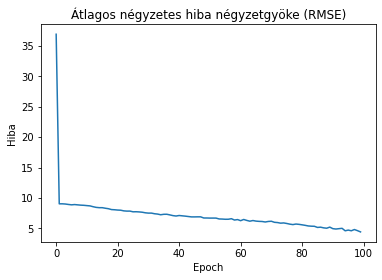

In [14]:
plt.plot(hist.history['root_mean_squared_error'])
plt.title('Átlagos négyzetes hiba négyzetgyöke (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Hiba')
plt.show()

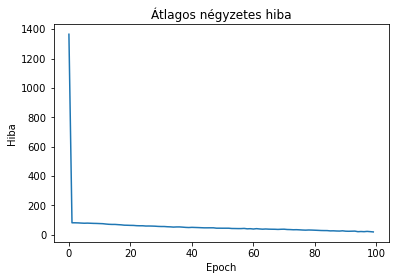

In [15]:
plt.plot(hist.history['loss'])
plt.title('Átlagos négyzetes hiba')
plt.xlabel('Epoch')
plt.ylabel('Hiba')
plt.show()

In [16]:
solcast.evaluate(x_train, y_train)

660/660 [==============================] - 0s 590us/step - loss: 35.4089 - root_mean_squared_error: 5.9505


[35.4089469909668, 5.950541973114014]

# Előrejelzés és annak hibája

In [17]:
from sklearn.metrics import mean_squared_error
y_pred = solcast.predict(x_test) 
y_pred_orig = y_sc.inverse_transform(y_pred) 
y_test_orig = y_sc.inverse_transform(y_test) 
RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

801.8211721109274

In [18]:
train_pred = solcast.predict(x_train) 
train_pred_orig = y_sc.inverse_transform(train_pred) 
y_train_orig = y_sc.inverse_transform(y_train) 
mean_squared_error(train_pred_orig, y_train_orig, squared = False)

754.4771376791274

In [19]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.9973950289534329

In [21]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[   83.70308685,    83.55444792],
       [ -215.74819946,    83.55444792],
       [   62.02298355,    83.55444792],
       ...,
       [23011.9375    , 28397.32379295],
       [46594.63671875, 46447.33590149],
       [38062.82421875, 38761.24617109]])

In [22]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[ 2825.79980469,  2426.65801469],
       [  894.8614502 ,   974.89741731],
       [ 1168.77929688,  1474.45521239],
       ...,
       [50833.87109375, 51842.30650573],
       [39648.9609375 , 39757.82593488],
       [48577.43359375, 48964.14357468]])

Text(0.5, 1.0, 'Teszt adathalmaz: Tényleges vs Előrejelzett termelt energiamennyiség')

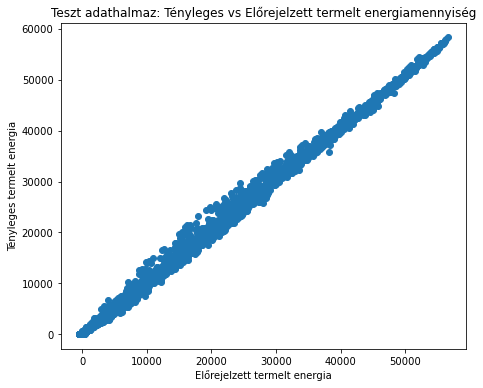

In [53]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Előrejelzett termelt energia')
plt.ylabel('Tényleges termelt energia')
plt.title('Teszt adathalmaz: Tényleges vs Előrejelzett termelt energiamennyiség')


# Adatok vissza állítása a normalizált adathalmazból

In [27]:
sc = StandardScaler()
pred_whole = solcast.predict(sc.fit_transform(x))
pred_whole_orig = y_sc.inverse_transform(pred_whole)
pred_whole_orig

array([[ -57.88371 ],
       [ -47.384686],
       [ -45.756405],
       ...,
       [1158.1069  ],
       [1147.5276  ],
       [1122.5044  ]], dtype=float32)